In [8]:
from ipywidgets import interact

In [3]:
N = 10000
t = np.arange(N)
omega_true = 0.015
sigma = 0.2
B1_true = 1/2
B2_true = np.sqrt(3/4)

In [4]:
rng = np.random.default_rng(seed=42)
noise = rng.standard_normal(size=N) * sigma
signal = B1_true * np.cos(omega_true * t) + B2_true * np.sin(omega_true * t) + noise 

In [7]:
omegas = np.linspace(0.01, 0.02, num=1000)
R1 = np.sum(signal[np.newaxis, :] * np.cos(omegas[:, np.newaxis] * t[np.newaxis, :]), axis=1)
R2 = np.sum(signal[np.newaxis, :] * np.sin(omegas[:, np.newaxis] * t[np.newaxis, :]), axis=1)

def plot_Q(B1, B2):
    f = B1 * np.cos(omegas[:, np.newaxis] * t[np.newaxis, :]) + B2 * np.sin(omegas[:, np.newaxis] * t[np.newaxis, :])
    Q = np.sum((signal[np.newaxis, :] - f)**2, axis=1)
    plt.plot(omegas, Q)

square_error = (R1**2 + R2**2) / N
print(omegas[np.argmax(square_error)])
print(omega_true)

0.014994994994994995
0.015


In [9]:
# plt.plot(omegas, (R1**2 + R2**2) / N)
# plt.plot(omegas, Q)
interact(plot_Q, B1=(0, 1, .01), B2=(0, 1, .01))

interactive(children=(FloatSlider(value=0.0, description='B1', max=1.0, step=0.01), FloatSlider(value=0.0, des…

<function __main__.plot_Q(B1, B2)>

In [35]:
from scipy.optimize import minimize

def fun(par, t, signal):
    omega, B1, B2 = par
    diffs = signal - B1 * np.cos(t * omega) - B2 * np.sin(t * omega)
    return(np.sum(diffs**2))

res = minimize(fun, [.01, 1, 1], args=(t, signal), method='Nelder-Mead')

In [38]:
print(res.x)
print(omega_true, B1_true, B2_true)

[0.01500115 0.50025565 0.87007318]
0.015 0.5 0.8660254037844386


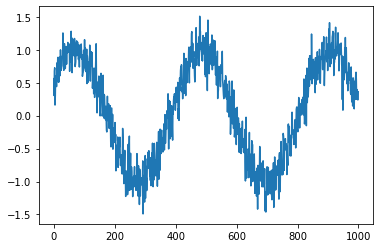

In [24]:
plt.plot(t[:1000], signal[:1000])